## Kobe Bryant Shot Selection Project

### Team Members: Kit Ha, Vinh Ngo, Johnathan Tahod, Anthony Collado

#### Credit to Kaggle for data and idea. Link to webpage below
#### https://www.kaggle.com/c/kobe-bryant-shot-selection
#### Github: https://github.com/johntahod/KobeBryant_ShotSelection/tree/master

##### *Markdown conventions just to be consistent
# Title
## Headers
### Sections
##### Notes/Comments

### Imports and Setting up the data frame + first look at data

In [255]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('data.csv')
display(kobe_data.head(5))

full_features = [kobe_data.columns]
print(full_features)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


[Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')]


### Setting up Lists

In [256]:
# Target List (this is our y)
target = ['shot_made_flag']

#### These are features we will not be using.
NO NEW DATA:
team_name: This feature will not be used because Kobe has only ever played for the Lakers so this provides no new data.
team_id: This is the same as team_name
matchup: This tells the same information as opponent (eg. Lakers vs Portland)

Little Data:
game_event_id: Don't need to id the game
game_id: Same reason as above

Arguably Little Data:
season: Season shouldn't have an effect on the shot
game_date: Dates shouldn't effect the shot much

In [257]:
# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'season', 'game_date']

#### Removing unused features

In [258]:
removed_features = unused_features
# print(removed_features)

feature_cols = [feature for feature in kobe_data.columns if feature not in removed_features]
# print(feature_cols)

display(kobe_data[feature_cols].head(5))

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id
0,Jump Shot,Jump Shot,33.9723,167,72,-118.1028,10,1,0,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,1
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,3
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,0,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,4
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,0,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,5


### Implement One-Hot-Encoding

In [259]:
# Features for One-Hot-Encoding
OHE_features = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']

In [260]:
# import for one hot encoding
from sklearn.preprocessing import OneHotEncoder
dummies = pd.DataFrame()

for feature in OHE_features:
    dummies = pd.concat([dummies, pd.get_dummies(kobe_data[feature])], axis = 'columns')
    dummies.drop(dummies.columns[[-1,]], axis=1, inplace=True)
    
display(dummies.head(5))

,Alley Oop Dunk Shot,Alley Oop Layup shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,Driving Bank shot,Driving Dunk Shot,Driving Finger Roll Layup Shot,Driving Finger Roll Shot,Driving Floating Bank Jump Shot,Driving Floating Jump Shot,...,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [261]:
merged = pd.concat([kobe_data[feature_cols], dummies], axis='columns')

display(merged.head(5))

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN
0,Jump Shot,Jump Shot,33.9723,167,72,-118.1028,10,1,0,27,...,0,0,0,1,0,0,0,0,0,0
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,22,...,0,0,0,1,0,0,0,0,0,0
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,45,...,0,0,0,1,0,0,0,0,0,0
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,0,52,...,0,0,0,1,0,0,0,0,0,0
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,0,19,...,0,0,0,1,0,0,0,0,0,0


In [262]:
final_OHE = merged.drop(OHE_features, axis='columns')
final_features = [final_OHE.columns]
display(final_OHE.head(5))

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,...,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN
0,33.9723,167,72,-118.1028,10,1,0,27,18,NaN,...,0,0,0,1,0,0,0,0,0,0
1,34.0443,-157,0,-118.4268,10,1,0,22,15,0.0,...,0,0,0,1,0,0,0,0,0,0
2,33.9093,-101,135,-118.3708,7,1,0,45,16,1.0,...,0,0,0,1,0,0,0,0,0,0
3,33.8693,138,175,-118.1318,6,1,0,52,22,0.0,...,0,0,0,1,0,0,0,0,0,0
4,34.0443,0,0,-118.2698,6,2,0,19,0,1.0,...,0,0,0,1,0,0,0,0,0,0


#### Y value splits

In [263]:
# Data frame but with the prediction rows removed (rows with a Nan value in the target column)
testing_data = final_OHE.dropna()
y = testing_data[target]
y.shape

(25697, 1)

#### X value splits

In [264]:
# Data with all prediction data dropped (so that we don't learn from it)
X = testing_data.drop(['shot_id', 'shot_made_flag'], axis=1)
X.shape


(25697, 117)

#### Prediction data split.
#### DO NOT USE IN TRAINING!
#### This is for submission

In [265]:
prediction_data = final_OHE[final_OHE['shot_made_flag'].isnull()]
final_prediction_data = prediction_data.drop(['shot_id', 'shot_made_flag'], axis=1)
display(final_prediction_data)

# Second way to write this
# nan_rows = kobe_data[kobe_data[target].isnull().any(1)]
# print(nan_rows)

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,Alley Oop Dunk Shot,...,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN
0,33.9723,167,72,-118.1028,10,1,0,27,18,0,...,0,0,0,1,0,0,0,0,0,0
7,34.0163,1,28,-118.2688,8,3,0,5,2,0,...,0,0,0,1,0,0,0,0,0,0
16,34.0443,0,0,-118.2698,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
19,34.0443,0,0,-118.2698,10,3,0,46,0,0,...,0,0,0,0,0,0,0,0,1,0
32,33.9683,163,76,-118.1068,11,1,0,26,17,0,...,0,0,0,0,0,0,0,0,0,1
33,33.8503,70,194,-118.1998,10,1,0,58,20,0,...,0,0,0,0,0,0,0,0,0,1
34,34.0253,1,19,-118.2688,7,1,0,33,1,0,...,0,0,0,0,0,0,0,0,0,1
35,34.0293,-12,15,-118.2818,5,1,0,58,1,0,...,0,0,0,0,0,0,0,0,0,1
36,34.0403,1,4,-118.2688,4,1,0,9,0,0,...,0,0,0,0,0,0,0,0,0,1
37,33.9283,-117,116,-118.3868,5,2,0,33,16,0,...,0,0,0,0,0,0,0,0,0,1


### Finding the accuracy of KNN using all features after OHE

In [266]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.4, random_state=10)

In [268]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [269]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [270]:
y_predict = knn.predict(X_test)

In [271]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)

print(accuracy)

0.5584200797742971


### Finding the accuracy using Logistic Regression using OHE data

In [272]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.25, 
                                                    random_state=6)

# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression(solver='lbfgs', max_iter=4000)

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_predict_lr)
print('Logistic Regression Accuracy: ' + str(accuracy))

Logistic Regression: 0.6863813229571984


### Final prediction for Logistic Regression

In [273]:
final_predict_lr = my_logreg.predict(final_prediction_data)
display(final_predict_lr)

array([0., 0., 1., ..., 1., 1., 0.])

### Store Logistic Regression prediction

In [274]:
lr_submission = pd.DataFrame({'shot_id':prediction_data['shot_id'],'shot_made_flag':final_predict_lr})
display(lr_submission)

,shot_id,shot_made_flag
0,1,0.0
7,8,0.0
16,17,1.0
19,20,1.0
32,33,0.0
33,34,1.0
34,35,1.0
35,36,1.0
36,37,1.0
37,38,0.0


In [275]:
filename = 'LR_KobePrediction1.csv'

lr_submission.to_csv(filename, index=False)

print('Saved file: ' + filename)

Saved file: LR_KobePrediction1.csv


#### The score of the first submission for logistic regression is 11.10082

### AUC - ROC: Logistic Regression

FPR: [0.         0.         0.         ... 0.99528955 0.99528955 1.        ]
TPR: [0.00000000e+00 3.55113636e-04 1.45596591e-02 ... 9.99644886e-01
 1.00000000e+00 1.00000000e+00]
AUC: 0.6946001080002016


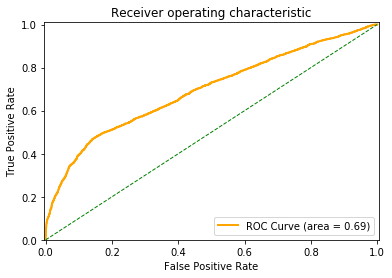

In [276]:
import matplotlib.pyplot as plt
from sklearn import metrics

Prediction = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Prediction[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('FPR:', fpr)
print('TPR:', tpr)
print('AUC:', AUC)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, and Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### K-Fold Cross-Validation with Logistic Regression (K = 3)

In [277]:
# importing the method:
from sklearn.model_selection import cross_val_score

# Applying 10-fold cross validation with "logistic regression" classifier:
# In the following line, "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression(solver='lbfgs', max_iter=5000)

# function cross_val_score performs Cross Validation:
accuracy_list = cross_val_score(my_logreg, X, y.values.ravel(), cv=3, scoring='accuracy')

print(accuracy_list)

[0.68456689 0.67756246 0.67764156]


### Sample output is [0.68456689 0.67756246 0.67764156]

### Finding the best accuracy using Random Forest using OHE data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 1000, bootstrap = True, random_state=3)

my_RandomForest.fit(X_train, y_train)

In [ ]:
y_predict_rf = my_RandomForest.predict(X_test)
display(y_predict_rf)

In [ ]:
rf_accuracy = accuracy_score(y_test, y_predict_rf)

print(rf_accuracy)

#### The accuracy of Random Forest Model using all features after OHE is 66%

### Set up final Prediction

In [ ]:
final_predict_rf = my_RandomForest.predict(final_prediction_data)
display(final_predict_rf)

### Store prediction into CSV

In [ ]:
rf_submission = pd.DataFrame({'shot_id':prediction_data['shot_id'],'shot_made_flag':final_predict_rf})
display(rf_submission)

In [ ]:
filename = 'RF_KobePrediction1.csv'

rf_submission.to_csv(filename, index=False)

print('Saved file: ' + filename)

### The score of the first submission is 12.33045
#### *Lower is better. With the best score currently being 0.5

### Feature Selection and Reduction

In [99]:
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# integer is number of trees in model
model = my_RandomForest

feature_importance = []
for feature in zip(X_train.columns, my_RandomForest.feature_importances_):
    feature_importance.append(feature)
    print(feature)

('lat', 0.08121472655453141)
('loc_x', 0.08155108220310475)
('loc_y', 0.08110657639706595)
('lon', 0.08117857551689392)
('minutes_remaining', 0.08582014074278291)
('period', 0.05065913114983507)
('playoffs', 0.014758302016205234)
('seconds_remaining', 0.12441427644210196)
('shot_distance', 0.05041610817306987)
('Alley Oop Dunk Shot', 0.0005965573808652757)
('Alley Oop Layup shot', 0.000569486953976916)
('Cutting Finger Roll Layup Shot', 0.0)
('Cutting Layup Shot', 6.54405733533211e-05)
('Driving Bank shot', 2.8103529237178108e-05)
('Driving Dunk Shot', 0.0019203901272866945)
('Driving Finger Roll Layup Shot', 0.000752171704913268)
('Driving Finger Roll Shot', 0.0008241624537714803)
('Driving Floating Bank Jump Shot', 1.5260956609036633e-05)
('Driving Floating Jump Shot', 1.0929057249135875e-05)
('Driving Hook Shot', 9.081831931927889e-05)
('Driving Jump shot', 0.00033671391478033177)
('Driving Layup Shot', 0.008281522924485)
('Driving Reverse Layup Shot', 0.0005941760910769248)
('Drivi

In [100]:
from operator import itemgetter
sorted(feature_importance,key=itemgetter(1))

[('Cutting Finger Roll Layup Shot', 0.0),
 ('Turnaround Fadeaway Bank Jump Shot', 0.0),
 ('Running Slam Dunk Shot', 1.3420930889428105e-06),
 ('Putback Slam Dunk Shot', 2.0749333412063774e-06),
 ('Tip Layup Shot', 1.0003945253539943e-05),
 ('Driving Floating Jump Shot', 1.0929057249135875e-05),
 ('Driving Floating Bank Jump Shot', 1.5260956609036633e-05),
 ('Hook Bank Shot', 1.9631249226667653e-05),
 ('Driving Bank shot', 2.8103529237178108e-05),
 ('Turnaround Finger Roll Shot', 3.199684747862026e-05),
 ('Running Tip Shot', 3.733497964020078e-05),
 ('Reverse Slam Dunk Shot', 4.457403608493834e-05),
 ('Running Pull-Up Jump Shot', 4.564197701177436e-05),
 ('Cutting Layup Shot', 6.54405733533211e-05),
 ('Turnaround Hook Shot', 6.732401456176628e-05),
 ('Running Finger Roll Layup Shot', 7.156093554946473e-05),
 ('Follow Up Dunk Shot', 8.156890316156422e-05),
 ('Putback Dunk Shot', 8.960004209340137e-05),
 ('Driving Hook Shot', 9.081831931927889e-05),
 ('Putback Layup Shot', 9.1354350410183

#### Based off the importances, it appears that the type of shots have low impact on the final prediction.
#### We also learn that the time remaining has the highest impact on the prediction. With seconds_remaining being the most importance.

In [101]:
# The threshold is set to .001 to allow only features with high importance
new_model = SelectFromModel(model, threshold=.001)
new_model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=3, verbose=0,
    

In [102]:
for feature_list_index in new_model.get_support(indices=True):
    display(X_train.columns[feature_list_index])

'lat'

'loc_x'

'loc_y'

'lon'

'minutes_remaining'

'period'

'playoffs'

'seconds_remaining'

'shot_distance'

'Driving Dunk Shot'

'Driving Layup Shot'

'Fadeaway Jump Shot'

'Jump Bank Shot'

'Jump Shot'

'Layup Shot'

'Pullup Jump shot'

'Reverse Layup Shot'

'Running Jump Shot'

'Slam Dunk Shot'

'Step Back Jump shot'

'Turnaround Fadeaway shot'

'Dunk'

'Jump Shot'

'Layup'

'2PT Field Goal'

'Center(C)'

'Left Side Center(LC)'

'Left Side(L)'

'Right Side Center(RC)'

'Above the Break 3'

'In The Paint (Non-RA)'

'Mid-Range'

'Restricted Area'

'16-24 ft.'

'24+ ft.'

'8-16 ft.'

'ATL'

'BOS'

'CHA'

'CHI'

'CLE'

'DAL'

'DEN'

'DET'

'GSW'

'HOU'

'IND'

'LAC'

'MEM'

'MIA'

'MIL'

'MIN'

'NJN'

'NOH'

'NOP'

'NYK'

'OKC'

'ORL'

'PHI'

'PHX'

'POR'

'SAC'

'SAS'

'SEA'

'TOR'

'UTA'

'VAN'

In [103]:
X_important_train = new_model.transform(X_train)
X_important_test = new_model.transform(X_test) 

### New Random Forest Classifier using most important features

In [104]:
clf_important = RandomForestClassifier(n_estimators = 1000, bootstrap = True, random_state=3)

clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [105]:
y_important_pred = clf_important.predict(X_important_test)

accuracy_score(y_test, y_important_pred)

0.6694163424124514

### Reducing the number of features did not change the accuracy much. The accuracy stayed around 66%

In [106]:
clf_prediction_data = new_model.transform(final_prediction_data)
feature_selection_predict = clf_important.predict(clf_prediction_data)

rf_submission = pd.DataFrame({'shot_id':prediction_data['shot_id'],'shot_made_flag':feature_selection_predict})


filename = 'RF_FeatSelect_KobePrediction2.csv'

rf_submission.to_csv(filename, index=False)

print('Saved file: ' + filename)

Saved file: RF_FeatSelect_KobePrediction2.csv


#### Final Score of 11.61893

### Parameter Tuning

In [ ]:
parameters = {
    "n_estimators":[5,10,50,100,250,500,1000],
    "max_depth":[2,4,8,16,32,None]
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(clf_important, parameters, cv=5)
cv.fit(X_important_train, y_train)

In [ ]:
print(f'Best parameters are: {cv.best_params_}')
print("\n")
mean_score = cv.cv_results_['mean_test_score']
std_score = cv.cv_results_['std_test_score']
params = cv.cv_results_['params']
for mean,std,params in zip(mean_score, std_score, params):
    print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

#### After testing possible parameters for our Random Forest Classifer, we see that a max_depth of 16 and n_estimators of 500 would be optimal.

### Creating a new Random Classifier with a our parameters.

In [ ]:
clf_params = RandomForestClassifier(n_estimators = 500, max_depth = 16, bootstrap = True, random_state=3)

clf_params.fit(X_important_train, y_train)

In [ ]:
y_params_predict = clf_params.predict(X_important_test)

accuracy_score(y_test, y_params_predict)

### After tuning the parameters, we have increased the accuracy by about 2% from 66% to 68%. 

In [ ]:
param_selection_predict = clf_params.predict(clf_prediction_data)

rf_submission = pd.DataFrame({'shot_id':prediction_data['shot_id'],'shot_made_flag':param_selection_predict})

filename = 'RF_ParamSelect_KobePrediction3.csv'

rf_submission.to_csv(filename, index=False)

print('Saved file: ' + filename)